This file generates figures comparing Models II and III and comparing Model III for different values of rho.  

Set SLIDES=True for larger fontsizes and linewidths appropriate for slides.  Set SLIDES=False for normal fontsizes and linewidths appropriate for the paper.

Created by Kerry Back
July, 2024

In [1]:
SLIDES = False

In [2]:
import pandas as pd 
import numpy as np
from scipy.interpolate import splrep, splev
from core.core import *
from core.model1 import Stage1 as Model1_Stage1
from core.model2 import Stage1 as Model2_Stage1, Stage2 as Model2_Stage2
from core.model3 import Stage1 as Model3_Stage1, Stage2 as Model3_Stage2

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
colors = sns.color_palette()

mpl.rcParams['font.size'] = 10 + 2*SLIDES
mpl.rcParams['axes.titlesize'] = 14 + 2*SLIDES
mpl.rcParams['axes.labelsize'] = 12 + 2*SLIDES
mpl.rcParams['xtick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['ytick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.fontsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.title_fontsize'] = 0
mpl.rcParams['figure.figsize'] = (8, 4)
linewidth = 3 if SLIDES else 1
FigureDir = "../Slides" if SLIDES else "../Figures"

mu = 103
mustar = 100
sigma = sig = 20
lam = 1000
rsquared = 0.2
rho = 0.5
model1_stage1 = Model1_Stage1(mu, mustar, sigma, rho, lam, rsquared)
model2_stage1 = Model2_Stage1(mu, mustar, sigma, rho, lam, rsquared)
model2_stage2 = Model2_Stage2(mu, mustar, sigma, rho, lam, rsquared)
model3_stage1 = Model3_Stage1(mu, mustar, sigma, rho, lam, rsquared)
model3_stage2 = Model3_Stage2(mu, mustar, sigma, rho, lam, rsquared)
m1 = Model3_Stage1(mu, mustar, sigma, 0.1, lam, rsquared)
m9 = Model3_Stage1(mu, mustar, sigma, 0.9, lam, rsquared)

c:\Users\skazempour\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


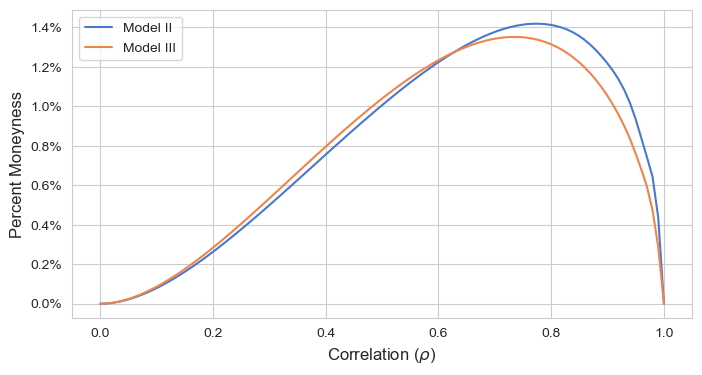

In [3]:
fixed_points2 = pd.read_csv("fixed_points/model2.csv", index_col=0) 
fixed_points3 = pd.read_csv("fixed_points/model3.csv", index_col=0) 
rhos2 = np.round(fixed_points2.columns.astype(float), 2)
rhos3 = np.round(fixed_points3.columns.astype(float), 2)

fig, ax = plt.subplots()

for t in [0.5]:
    b2 = []
    b3 = []
    p2 = []
    p3 = []
    for rho in rhos2:
        m2 = Model2_Stage1(mu, mustar, sigma, rho, lam, rsquared)
        b2.append(m2.bdy(t))
        p2.append(m2.price1(t))
    for rho in rhos3:
        m3 = Model3_Stage1(mu, mustar, sigma, rho, lam, rsquared)
        b3.append(m3.bdy(t))
        p3.append(m3.price(t))

    value2 = [(b-p)/b for b, p in zip(b2, p2)]
    value3 = [(b-p)/b for b, p in zip(b3, p3)]
    rhos2_ = [0] + list(rhos2) + [1]
    value2 = [0] + value2 + [0]
    rhos3_ = [0] + list(rhos3) + [1]
    value3 = [0] + value3 + [0]

    spl2 = splrep(rhos2_, value2)
    spl3 = splrep(rhos3_, value3)

    rhos = np.linspace(0, 1, 100)
    value2 = splev(rhos, spl2, der=0)
    value3 = splev(rhos, spl3, der=0)
    
    if t == 0.2:
        ax.plot(rhos, 100*value2, c=col)
        ax.plot(rhos, 100*value3, c=col, ls=":")
    else:
        ax.plot(rhos, 100*value2, label="Model II")
        ax.plot(rhos, 100*value3, label="Model III")
ax.set_xlabel(r"Correlation ($\rho$)")
ax.set_ylabel("Percent Moneyness")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.legend()
fig.savefig(f"{FigureDir}/models_all_moneyness.pdf")

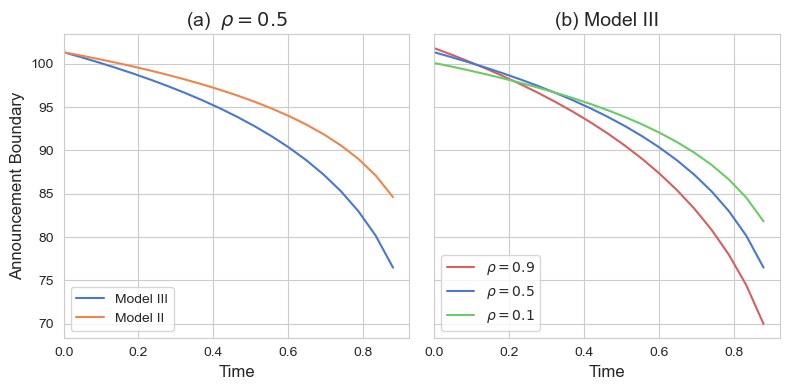

In [3]:
grid = np.linspace(0, 0.88, 20)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(
    grid, 
    [model3_stage1.bdy(t) for t in grid], 
    c=colors[0],
    label="Model III"
)

ax1.plot(
    grid, 
    [model2_stage1.bdy(t) for t in grid], 
    c=colors[1],
    label="Model II"
)


ax2.plot(
    grid, 
    [m9.bdy(t) for t in grid], 
    c=colors[3],
    label=r"$\rho=0.9$"
)

ax2.plot(
    grid, 
    [model3_stage1.bdy(t) for t in grid], 
    c=colors[0],
    label=r"$\rho=0.5$"
)

ax2.plot(
    grid, 
    [m1.bdy(t) for t in grid], 
    c=colors[2],
    label=r"$\rho=0.1$"
)

ax1.legend(loc="lower left")
ax1.set_xlabel("Time") 
ax1.set_ylabel("Announcement Boundary")

ax2.legend(loc="lower left")
ax2.set_xlabel("Time") 

ax1.set_title(r"(a) $\; \rho=0.5$")
ax2.set_title("(b) Model III")

ax1.set_xlim((0, ax1.get_xlim()[1]))
ax2.set_xlim((0, ax2.get_xlim()[1]))

fig.tight_layout()

fig.savefig(f"{FigureDir}/models_all_boundaries.pdf")

plt.show()

0.2666666666696452
0.20000000000482338
0.21052631580129444
0.2666666666696452
0.363636363638479


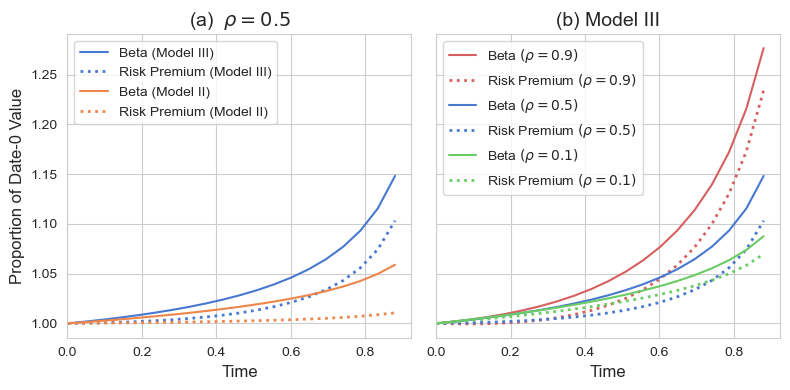

In [4]:
grid = np.linspace(0, 0.88, 20)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(
    grid, 
    [model3_stage1.beta(t)/model3_stage1.beta(0) for t in grid], 
    c=colors[0],
    label="Beta (Model III)"
)

rprem = [model3_stage1.mean(t) - model3_stage1.price(t) for t in grid]
ax1.plot(
    grid, 
    np.array(rprem)/rprem[0], 
    c=colors[0],
    ls=":",
    lw=linewidth + 1,
    label="Risk Premium (Model III)"
)

mprem = [model3_stage1.mean_of_w(t) - model3_stage1.price_of_w(t) for t in grid]
mprem = np.array(mprem)[1:] / mprem[0] - 1
rprem2 = np.array(rprem)[1:] / rprem[0] - 1
ratio = mprem / rprem2
print(np.max(ratio))

ax1.plot(
    grid, 
    [model2_stage1.beta1(t)/model2_stage1.beta1(0) for t in grid], 
    c=colors[1],
    label="Beta (Model II)"
)

rprem = [model2_stage1.mean1(t) - model2_stage1.price1(t) for t in grid]
mprem = [model2_stage1.mean_of_w(t) - model2_stage1.price_of_w(t) for t in grid]
mprem = np.array(mprem)[1:] / mprem[0] - 1
rprem2 = np.array(rprem)[1:] / rprem[0] - 1
ratio = mprem / rprem2
print(np.max(ratio))

ax1.plot(
    grid, 
    np.array(rprem)/rprem[0], 
    ls=":", 
    lw=linewidth + 1,
    c=colors[1],
    label="Risk Premium (Model II)"
)

ax2.plot(
    grid, 
    [m9.beta(t)/m9.beta(0) for t in grid], 
    c=colors[3],
    label=r"Beta $(\rho=0.9)$"
)

rprem = [m9.mean(t) - m9.price(t) for t in grid]
mprem = [m9.mean_of_w(t) - m9.price_of_w(t) for t in grid]
mprem = np.array(mprem)[1:] / mprem[0] - 1
rprem2 = np.array(rprem)[1:] / rprem[0] - 1
ratio = mprem / rprem2
print(np.max(ratio))
ax2.plot(
    grid, 
    np.array(rprem)/rprem[0], 
    ls=":", 
    lw=linewidth + 1,
    c=colors[3],
    label=r"Risk Premium $(\rho=0.9)$"
)

ax2.plot(
    grid, 
    [model3_stage1.beta(t)/model3_stage1.beta(0) for t in grid], 
    c=colors[0],
    label=r"Beta $(\rho=0.5)$"
)

rprem = [model3_stage1.mean(t) - model3_stage1.price(t) for t in grid]
mprem = [model3_stage1.mean_of_w(t) - model3_stage1.price_of_w(t) for t in grid]
mprem = np.array(mprem)[1:] / mprem[0] - 1
rprem2 = np.array(rprem)[1:] / rprem[0] - 1
ratio = mprem / rprem2
print(np.max(ratio))

ax2.plot(
    grid, 
    np.array(rprem)/rprem[0], 
    c=colors[0],
    ls=":",
    lw=linewidth + 1,
    label=r"Risk Premium $(\rho=0.5)$"
)

ax2.plot(
    grid, 
    [m1.beta(t)/m1.beta(0) for t in grid], 
    c=colors[2],
    label=r"Beta $(\rho=0.1)$"
)


rprem = [m1.mean(t) - m1.price(t) for t in grid]
mprem = [m1.mean_of_w(t) - m1.price_of_w(t) for t in grid]
mprem = np.array(mprem)[1:] / mprem[0] - 1
rprem2 = np.array(rprem)[1:] / rprem[0] - 1
ratio = mprem / rprem2
print(np.max(ratio))

ax2.plot(
    grid, 
    np.array(rprem)/rprem[0], 
    c=colors[2],
    ls=":",
    lw=linewidth + 1,
    label=r"Risk Premium $(\rho=0.1)$"
)

ax1.legend(loc="upper left")
ax1.set_xlabel("Time") 
ax1.set_ylabel("Proportion of Date-0 Value")

ax2.legend(loc="upper left")
ax2.set_xlabel("Time") 

ax1.set_title(r"(a) $\; \rho=0.5$")
ax2.set_title("(b) Model III")

ax1.set_xlim((0, ax1.get_xlim()[1]))
ax2.set_xlim((0, ax2.get_xlim()[1]))

fig.tight_layout()

fig.savefig(f"{FigureDir}/models_all_risk.pdf")

plt.show()

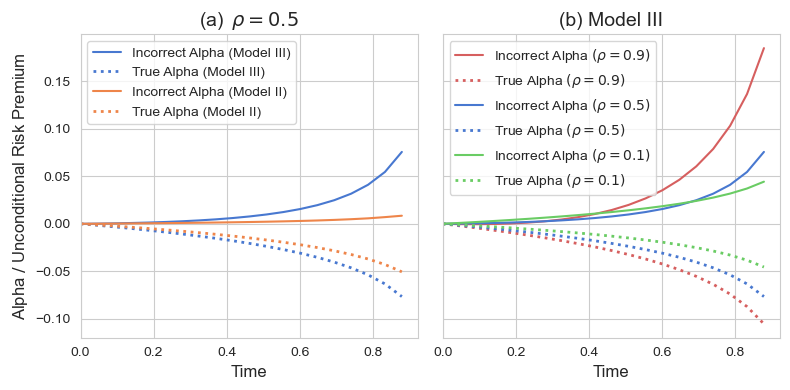

In [5]:
grid = np.linspace(0, 0.88, 20)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(
    grid, 
    [model3_stage1.alpha_wrong(t) / (mu-mustar) for t in grid], 
    c=colors[0],
    label="Incorrect Alpha (Model III)"
)

ax1.plot(
    grid, 
    [model3_stage1.alpha(t) / (mu-mustar) for t in grid], 
    c=colors[0],
    ls=":",
    lw=linewidth + 1,
    label="True Alpha (Model III)"
)

ax1.plot(
    grid, 
    [model2_stage1.alpha1_wrong(t) / (mu-mustar) for t in grid], 
    c=colors[1],
    label="Incorrect Alpha (Model II)"
)

ax1.plot(
    grid, 
    [model2_stage1.alpha1(t) / (mu-mustar) for t in grid], 
    ls=":", 
    lw=linewidth + 1,
    c=colors[1],
    label="True Alpha (Model II)"
)


ax2.plot(
    grid, 
    [m9.alpha_wrong(t) / (mu-mustar) for t in grid], 
    c=colors[3],
    label=r"Incorrect Alpha $(\rho=0.9)$"
)

ax2.plot(
    grid, 
    [m9.alpha(t) / (mu-mustar) for t in grid], 
    ls=":", 
    lw=linewidth + 1,
    c=colors[3],
    label=r"True Alpha $(\rho=0.9)$"
)

ax2.plot(
    grid, 
    [model3_stage1.alpha_wrong(t) / (mu-mustar) for t in grid], 
    c=colors[0],
    label=r"Incorrect Alpha $(\rho=0.5)$"
)

ax2.plot(
    grid, 
    [model3_stage1.alpha(t) / (mu-mustar) for t in grid], 
    c=colors[0],
    ls=":",
    lw=linewidth + 1,
    label=r"True Alpha $(\rho=0.5)$"
)

ax2.plot(
    grid, 
    [m1.alpha_wrong(t) / (mu-mustar) for t in grid], 
    c=colors[2],
    label=r"Incorrect Alpha $(\rho=0.1)$"
)

ax2.plot(
    grid, 
    [m1.alpha(t) / (mu-mustar) for t in grid], 
    ls=":", 
    lw=linewidth + 1,
    c=colors[2],
    label=r"True Alpha $(\rho=0.1)$")

ax1.legend(loc="upper left")
ax1.set_xlabel("Time") 
ax1.set_ylabel(r"Alpha $/$ Unconditional Risk Premium")
ax1.set_title(r"(a) $\, \rho=0.5$")

ax2.legend(loc="upper left")
ax2.set_xlabel("Time") 
ax2.set_title("(b) Model III")

ax1.set_xlim((0, ax1.get_xlim()[1]))
ax2.set_xlim((0, ax2.get_xlim()[1]))

fig.tight_layout()
fig.savefig(f"{FigureDir}/models_all_alphas.pdf")

plt.show()

c:\Users\skazempour\disclosures\announcements\Code\core\core.py:137: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  r1 = price.pct_change()
c:\Users\skazempour\disclosures\announcements\Code\core\core.py:138: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mret = mkt.pct_change()


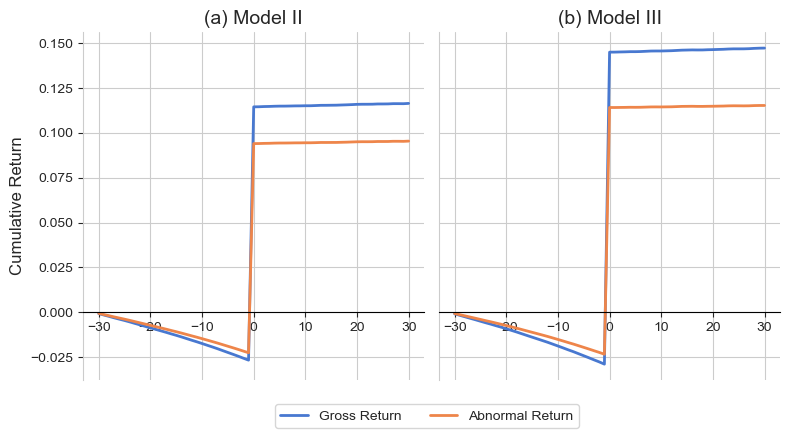

In [6]:
window = 30 

price = pd.read_csv("simulations/model2_daily_price1.csv", index_col="day")
mkt = pd.read_csv("simulations/model2_daily_mkt.csv", index_col="day")
price.columns = price.columns.astype(int)
mkt.columns = mkt.columns.astype(int)
ret2, mkt2 = kz(price, mkt, window)
xret2 = ret2 - mkt2

price = pd.read_csv("simulations/model3_daily_price1.csv", index_col="day")
mkt = pd.read_csv("simulations/model3_daily_mkt.csv", index_col="day")
price.columns = price.columns.astype(int)
mkt.columns = mkt.columns.astype(int)
ret3, mkt3 = kz(price, mkt, window)
xret3 = ret3 - mkt3

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for ax in (ax1, ax2):
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

(((1+ret2).cumprod() - 1).mean(axis=1)).plot(
    ax=ax1, 
    lw=linewidth + 1, 
    label="Gross Return"
) 
(((1+xret2).cumprod() - 1).mean(axis=1)).plot(
    ax=ax1, 
    lw=linewidth + 1, 
    label="Abnormal Return"
) 

ax1.set_title("(a) Model II")

(((1+ret3).cumprod() - 1).mean(axis=1)).plot(
    ax=ax2, 
    lw=linewidth + 1, 
 ) 
(((1+xret3).cumprod() - 1).mean(axis=1)).plot(
    ax=ax2, 
    lw=linewidth + 1, 
 ) 

ax2.set_title("(b) Model III")

ax1.set_ylabel("Cumulative Return")
ax1.set_xlabel("")
ax2.set_xlabel("")

fig.legend(bbox_to_anchor=(0.54, -0.1), loc='lower center', ncol=2)
fig.tight_layout()  
fig.savefig(f'{FigureDir}/models_all_kz.pdf', bbox_inches='tight')
plt.show()

In [7]:
def returns(data):
    out = None

    # firm 1 is first
    df = data[data.tau1 < data.tau2].copy()
    df["ret"] = df.x1 / df.price1 - 1
    df["scheduled"] = df.price_schedule1 / df.price1 - 1
    df["firm"] = 1
    df["peer"] = np.nan
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "first" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "first_scheduled"  
    out = pd.concat((out, d1, d2))

    # firm 1 is first
    df = data[data.tau1 < data.tau2].copy()
    df["ret"] = df.x2 / df.price2 - 1
    df["scheduled"] = df.price_schedule2 / df.price2 - 1
    df["peer"] = df.price_post / df.price_pre - 1
    df["firm"] = 2
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "second" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "second_scheduled"  
    d3 = df[["firm", "peer"]].copy()
    d3.columns =["firm", "ret"]
    d3["order"] = "peer"
    out = pd.concat((out, d1, d2, d3))
 
    # firm2 is first 
    df = data[data.tau1 > data.tau2].copy()
    df["ret"] = df.x2 / df.price2 - 1
    df["scheduled"] = df.price_schedule2 / df.price2 - 1
    df["peer"] = np.nan
    df["firm"] = 2
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "first" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "first_scheduled"  
    out = pd.concat((out, d1, d2))

    # firm2 is first 
    df = data[data.tau1 > data.tau2].copy()
    df["ret"] = df.x1 / df.price1 - 1
    df["scheduled"] = df.price_schedule1 / df.price1 - 1
    df["peer"] = df.price_post / df.price_pre - 1
    df["firm"] = 1
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "second" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "second_scheduled"  
    d3 = df[["firm", "peer"]].copy()
    d3.columns =["firm", "ret"]
    d3["order"] = "peer"
    out = pd.concat((out, d1, d2, d3))

    # simultaneous but firm 1 is first
    df = data[(data.tau1 == data.tau2) & (df.x1 > df.x2)].copy()
    df["ret"] = df.x1 / df.price1 - 1
    df["scheduled"] = df.price_schedule1 / df.price1 - 1
    df["firm"] = 1
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "first" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "first_scheduled"  
    out = pd.concat((out, d1, d2))
 
    # simultaneous but firm 1 is first
    df = data[(data.tau1 == data.tau2) & (df.x1 > df.x2)].copy()
    df["ret"] = df.x2 / df.price2 - 1
    df["scheduled"] = df.price_schedule2 / df.price2 - 1
    df["firm"] = 2
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "second" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "second_scheduled"  
    out = pd.concat((out, d1, d2))

    # simultaneous but firm 2 is first
    df = data[(data.tau1 == data.tau2) & (df.x1 <= df.x2)].copy()
    df["ret"] = df.x2 / df.price2 - 1
    df["scheduled"] = df.price_schedule2 / df.price2 - 1
    df["firm"] = 2
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "first" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "first_scheduled"  
    out = pd.concat((out, d1, d2))
 
    # simultaneous but firm 2 is first
    df = data[(data.tau1 == data.tau2) & (df.x1 <= df.x2)].copy()
    df["ret"] = df.x1 / df.price1 - 1
    df["scheduled"] = df.price_schedule1 / df.price1 - 1
    df["firm"] = 1
    d1 = df[["firm", "ret"]].copy()
    d1["order"] = "second" 
    d2 = df[["firm", "scheduled"]].copy()
    d2.columns = ["firm", "ret"]
    d2["order"] = "second_scheduled"  
    out = pd.concat((out, d1, d2))

    return out

In [8]:
model1 = pd.read_csv("simulations/model1_sim.csv", index_col=0)
model2 = pd.read_csv("simulations/model2_sim.csv", index_col=0)
model3 = pd.read_csv("simulations/model3_sim.csv", index_col=0)

mod1 = returns(model1)
mod1["model"] = "Model I"
mod2 = returns(model2)
mod2["model"] = "Model II"
mod3 = returns(model3)
mod3["model"] = "Model III"
df = pd.concat((mod1, mod2, mod3))

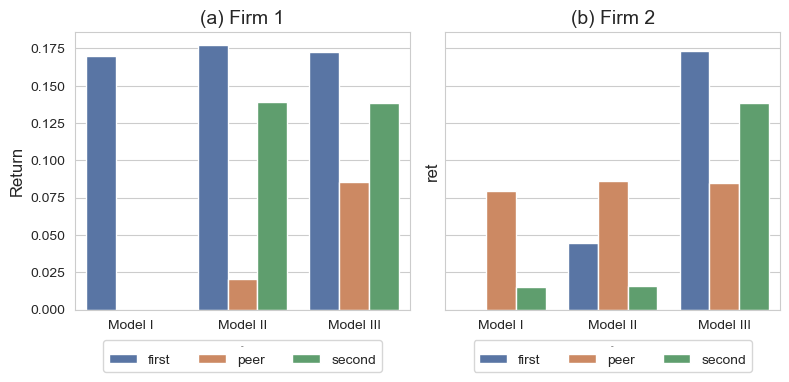

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.set_palette("deep")
data = df[df.firm==1].copy()
data = data[~data.order.isin(["first_scheduled", "second_scheduled"])]
ax1 = sns.barplot(
    data, 
    y="ret", 
    x="model", 
    hue="order", 
    hue_order = ["first", "peer", "second"],
    errorbar=None, 
    ax=ax1
)
sns.move_legend(
    ax1, 
    "lower center", 
    bbox_to_anchor=(0.5, -0.25), 
    ncol=3, 
    title="Model"
)

data = df[df.firm==2].copy()
data = data[~data.order.isin(["first_scheduled", "second_scheduled"])]
ax2 = sns.barplot(
    data, 
    y="ret", 
    x="model", 
    hue="order", 
    hue_order=["first", "peer", "second"],
    errorbar=None, 
    ax=ax2
)
sns.move_legend(
    ax2, 
    "lower center", 
    bbox_to_anchor=(0.5, -0.25), 
    ncol=3, 
    title="Model"
)

ax1.set_xlabel("")
ax1.set_ylabel("Return")
ax1.set_title("(a) Firm 1")

ax2.set_xlabel("")
ax2.set_title("(b) Firm 2")
fig.tight_layout()  
fig.savefig(f"{FigureDir}/models_all_announcements.pdf")

In [10]:
# Suppress pesky performance warnings
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Tabulate the results
index = pd.MultiIndex.from_product([["Model I", "Model II", "Model III"], ["First", "Peer", "Second"]])
index = index.insert([3, 6], ("", ""))

columns = pd.MultiIndex.from_product([["Firm 1", "Firm 2"], ["Mean", "S.E."]])
# columns = columns.insert(2, ("", ""))

tbl = pd.DataFrame(index=index, columns=columns, dtype=str)

for model in ["Model I", "Model II", "Model III"]:
    for order in ['First', 'Peer', 'Second']:
        for firm in [1, 2]:
            data = df[(df.model == model) & (df.order == order.lower()) & (df.firm == firm)].copy()
            mean = data.ret.mean()
            se = data.ret.std()/np.sqrt(len(data))
            tstat = mean/se
            tbl.loc[(model, order), (f"Firm {firm}", "Mean")] = f"{100*mean:.2f}"
            tbl.loc[(model, order), (f"Firm {firm}", "S.E.")] = f"{100*se:.2f}"

tbl = tbl.fillna("")
tbl = tbl.replace("nan", "")

latex_code = tbl.style.to_latex(
    column_format="llccccc",
    multirow_align='c',
    multicol_align='c',
    clines=None,
    hrules=True,
)

latex_code = latex_code.replace(r"&  & \multicolumn{2}{c}{Firm 1} & \multicolumn{2}{c}{Firm 2} \\", 
                                r"""&  & \multicolumn{2}{c}{Firm 1} & \multicolumn{2}{c}{Firm 2} \\
                                    \cline{3-4} \cline{5-6}""")

with open("../Tables/models_all_announcements.tex", "w") as f:
    f.write(latex_code)


In [11]:
def returns1(data):
    
    df = data.copy()
    df["order"] = np.where(
        (df.tau1 < df.tau2) | ((df.tau1 == df.tau2) & (df.x1 >= df.x2)),
        "first",
        "second"
    )
    df["schedule"] = np.log(df.price_schedule1 / df.price1)
    df["post_schedule"] = np.log(df.x1 / df.price_schedule1)
          
    return df

In [12]:
model10 = pd.read_csv("simulations/model3_sim_10.csv", index_col=0)
model50 = pd.read_csv("simulations/model3_sim.csv", index_col=0)
model90 = pd.read_csv("simulations/model3_sim_90.csv", index_col=0)

mod10 = returns(model10)
mod10["corr"] = "0.1"
mod50 = returns(model50)
mod50["corr"] = "0.5"
mod90 = returns(model90)
mod90["corr"] = "0.9"
df1 = pd.concat((mod10, mod50, mod90))

In [13]:
mod10 = returns1(model10)
mod10["corr"] = "corr=10%"
mod50 = returns1(model50)
mod50["corr"] = "corr=50%"
mod90 = returns1(model90)
mod90["corr"] = "corr=90%"
df2 = pd.concat((mod10, mod50, mod90))
df2 = df2[["corr", "order", "schedule", "post_schedule"]].copy()

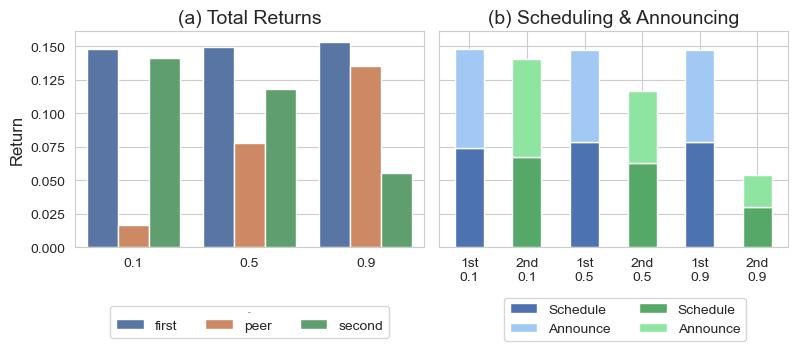

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

sns.set_palette("deep")
colors1 = sns.color_palette("deep")
colors2 = sns.color_palette("pastel")
data = df1[df1.firm==1].copy()
data = data[~data.order.isin(["first_scheduled", "second_scheduled"])]
data.ret = np.log(1+data.ret)
ax1 = sns.barplot(
    data, 
    y="ret", 
    x="corr", 
    hue="order", 
    hue_order = ["first", "peer", "second"],
    errorbar=None, 
    ax=ax1
)


ax1.set_xlabel("") 
ax1.set_ylabel("Return")

df2 = df2.groupby(["corr", "order"]).mean()
bottom = np.zeros(len(df2))
width = 0.5
ticks=["1st\n0.1", "2nd\n0.1", "1st\n0.5", "2nd\n0.5", "1st\n0.9", "2nd\n0.9"]
ax2.bar(
    ticks, 
    df2.schedule, 
    label="Schedule", 
    bottom=bottom,
    color=[colors1[0], colors1[2]] * 3,
    width=width
)
bottom += df2.schedule
ax2.bar(
    ticks, 
    df2.post_schedule, 
    label="Announce", 
    bottom=bottom,
    color=[colors2[0], colors2[2]] * 3,
    width=width
)

ax2.set_xlabel("") 
ax1.set_title("(a) Total Returns")
ax2.set_title("(b) Scheduling & Announcing")

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=colors1[0], label="Schedule"),
    Patch(facecolor=colors2[0], label="Announce"),
    Patch(facecolor=colors1[2], label="Schedule"),
    Patch(facecolor=colors2[2], label="Announce")
]

sns.move_legend(
    ax1, 
    "lower center", 
    bbox_to_anchor=(0.5, -0.45), 
    ncol=3, 
    title="Model"
)

ax2.legend(handles=legend_elements, ncol=2, bbox_to_anchor=(0.9, -0.2))
fig.tight_layout()  
fig.savefig(f"{FigureDir}/models_all_schedule.pdf")